## Churn Analysis

Objective: 
Customer churn is one of the most important metrics used to account the percentage of users who have stopped doing business with a company within a certain timeframe. The metric is having paramount importance in most B2C companies as it costs more to acquire a new customer than it does to retain existing customers. In order to acquire new customers, the business would end up burning their cash reserves through marketing and sales activities, instead, retaining the top customers are more effective as the company has earned the trust and loyalty of old customers. Telecom industry is one such industry which is extremely sensitive to customer churn as the competing companies tend to attract opponents phone users by aggressively pricing the data/call plans to pull the customers. Predicting the customer churn is very much essential in retaining the old customers


In [163]:
#import librabries to load telecom churn csv file in to notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
tel_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#Analze the first five rows
tel_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Manipulation

In [4]:
#We will check the datatype for any data inaccuracy
print(tel_churn.shape)
tel_churn.dtypes

(7043, 21)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There appears to be some issue with the column 'TotalCharges' as the datatype is object instead of float. We will review whether the column as null value. At first, we will convert the 'TotalCharges' datatype to numeric values. 

In [5]:
#Convert datatype to numeric for one of the column
tel_churn['TotalCharges']=pd.to_numeric(tel_churn['TotalCharges'],errors="coerce")
tel_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
#Checking missing values in totalcharges column. 
tel_churn['TotalCharges'].isnull().sum()

11

In [7]:
#Records having missing total charges will be removed as it's not significant.
tel_churn = tel_churn.dropna()

## Exploratory Data Analysis

Lets now analyze the tenure and total charges of the customer records to check how it is distributed.

In [9]:
tel_churn[['tenure','TotalCharges']].describe()

,tenure,TotalCharges
count,7032.000000,7032.000000
mean,32.421786,2283.300441
std,24.545260,2266.771362
min,1.000000,18.800000
25%,9.000000,401.450000
50%,29.000000,1397.475000
75%,55.000000,3794.737500
max,72.000000,8684.800000


The average tenure of customer lies between 2-3 years and they are expected to shell out an average of 2283 dollars for the servive. The data consists of customer records having a tenure between 1 and 72 months.

Lets us now visualize using pie chart on the percentage of customers who have ceased the service.

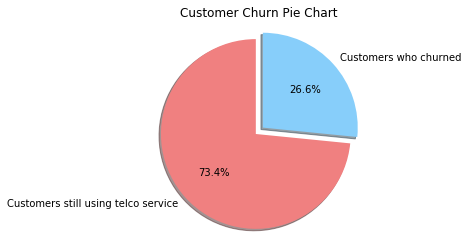

In [10]:
#labels
labels=['Customers still using telco service','Customers who churned']

#values
values = tel_churn["Churn"].value_counts().values.tolist()

colors = ['lightcoral', 'lightskyblue']

# Plot
plt.pie(values, labels=labels, explode=(0.1,0), colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title("Customer Churn Pie Chart")
plt.show()

From the chart, its clear that more than quarter of customers stopped using telco service. Let us know analyze how the gender distribution affects the customer churn.

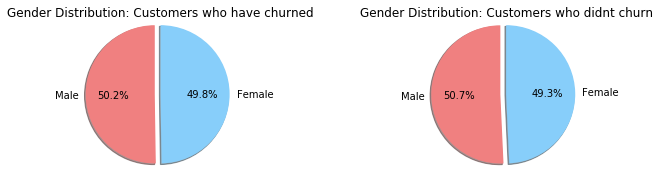

In [12]:
fig = plt.figure()

#labels
labels1 = tel_churn["gender"].value_counts().keys().tolist()

#values1 (Customers who have churned)
values1 = tel_churn.loc[tel_churn['Churn'] =='Yes']['gender'].value_counts().values.tolist()

#values2 (Customers who didnt churn)
values2 = tel_churn.loc[tel_churn['Churn'] =='No']['gender'].value_counts().values.tolist()

colors = ['lightcoral', 'lightskyblue']


ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(values1, labels=labels1,explode=(0.1,0), colors=colors,radius=1.2,
autopct='%1.1f%%', shadow=True, startangle=90)

ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(values2, labels=labels1,explode=(0.1,0), colors=colors,radius=1.2,
autopct='%1.1f%%', shadow=True, startangle=90)

ax1.set_title('Gender Distribution: Customers who have churned')

ax2.set_title('Gender Distribution: Customers who didnt churn')

plt.show()

From the chart, the gender distribution doesn't seem to affect the churn rate for the company.

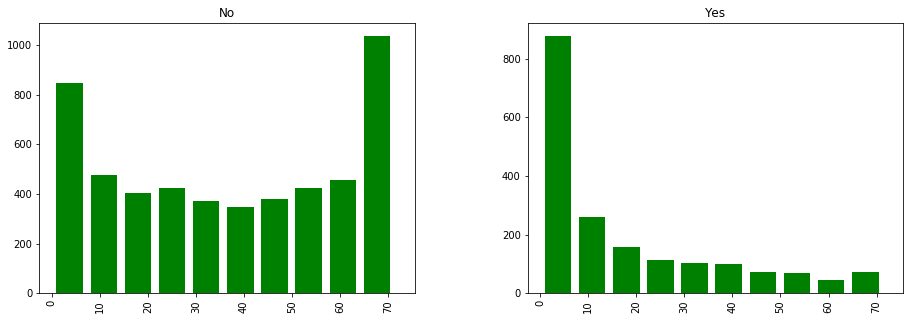

In [13]:
hist_tenure=tel_churn['tenure'].hist(by=tel_churn['Churn'],figsize=(15,5),width=5.5, color='green' )
plt.show()

The histogram shows distribution of customer tenures based on churn. The bulk of customers who didn't churn appears to be having a tenure of 70 and 10 months. Whereas, the customers who did churn is bound to stop using telco service within 10 months of service. 

In order to create a model, we would require features to have numerical values and label encoding done so that machine read and process the data. We will now encode the labels from majority of columns to numerical values.

In [14]:
from sklearn.preprocessing import LabelEncoder
#Let us transform the categorical columns to numeric values.
tel_churn = tel_churn.apply(LabelEncoder().fit_transform)
tel_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1


In [82]:
# Remove target and customer ID column as it isn't relevant to the analysis
features = tel_churn.iloc[:,1:]

# target
targets = tel_churn[['Churn']]

# Correlation Matrix

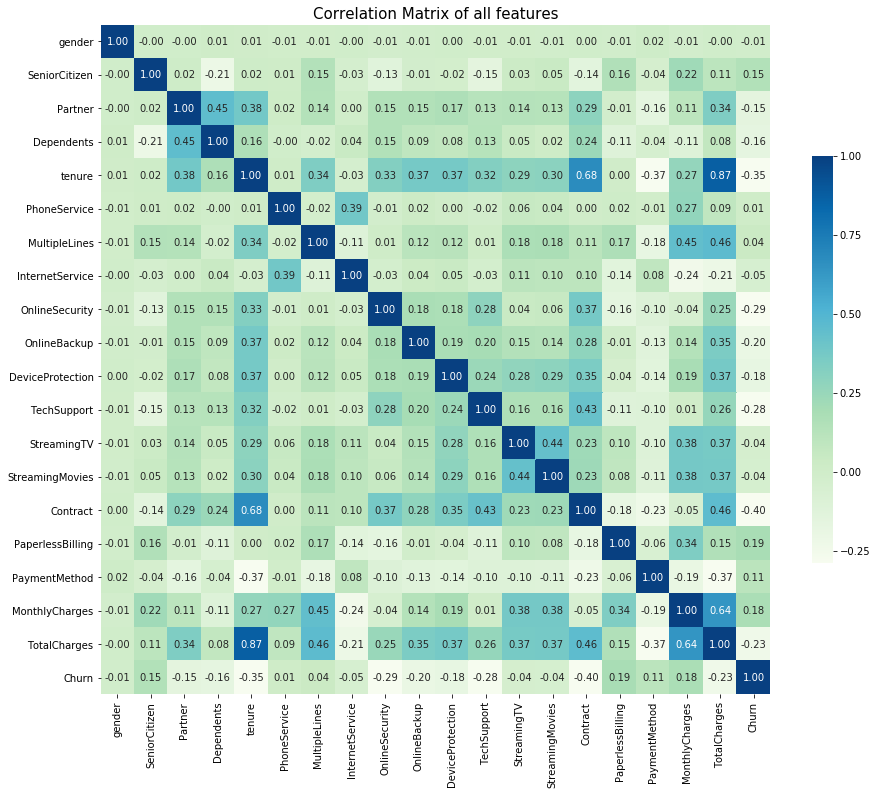

In [54]:
import seaborn as sns
correlation_matrix = features.corr()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(correlation_matrix,vmax=1,square=True,annot=True,fmt='.2f',cmap='GnBu',cbar_kws={"shrink": .5},robust=True)
plt.title('Correlation Matrix of all features', fontsize=15)
plt.show()

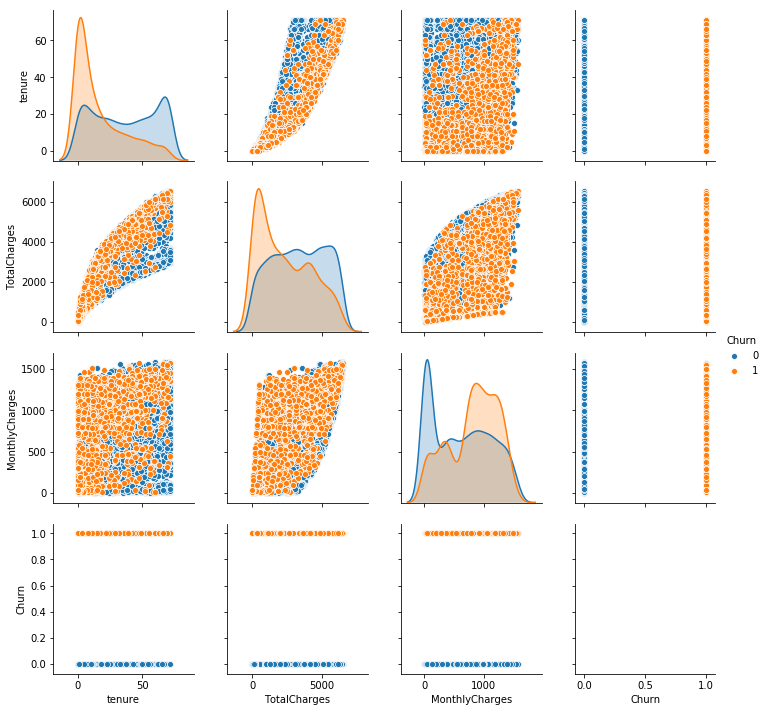

In [83]:
sns.pairplot(data=tel_churn[['tenure','TotalCharges','MonthlyCharges','Churn']], hue='Churn')

The result of this Correlation Matrix shows that there isn't much redundant variables in the sample. However, the tenure and totalcharges appears to be highly correlated with a correlation value of 0.87. We will exclude the totalcharges variable from the analysis so that it doesn't reduces the power of classification model to identify independent variables that are statistically significant

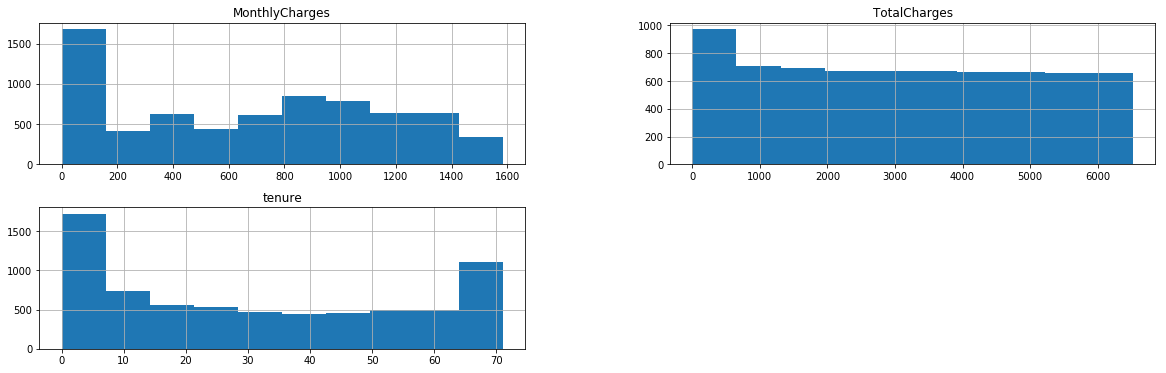

In [84]:
# Analysis of the dispersion of the main features
features[['tenure','TotalCharges','MonthlyCharges']].hist(figsize=(20, 6))
plt.show()

# Feature Selection

Feature selection is the important process of selecting all useful features in the data. Reduntant features will unnecessarily cause performance issue ,and  hence we should make sure only those feagtures which directly affects the prediction of the model should be used for the analysis.

In [164]:
#Update the dataframe to exclude totalcharges and customer ID from the features.
features = tel_churn.iloc[:,1:19]
features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

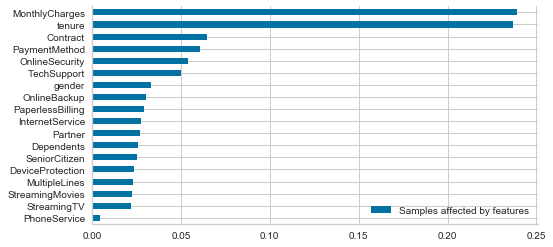

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# split dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=10)

#scaling the data
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Random Forest Model
rf = RandomForestClassifier()

# fit the model on your training data
rf.fit(X_train_std, y_train.values.ravel())

# plot the feature importance
feature_scores = pd.DataFrame(
    {
        'Samples affected by features': rf.feature_importances_
    },
    index=features.columns)
feature_scores = feature_scores.sort_values(by='Samples affected by features')
feature_scores.plot(kind='barh', figsize=(8, 4))
sns.despine()


# Recursive Feature Elimination

It is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. We will now make use of recursive feature elimination method to identiy whether the weakest feature can be eliminated.

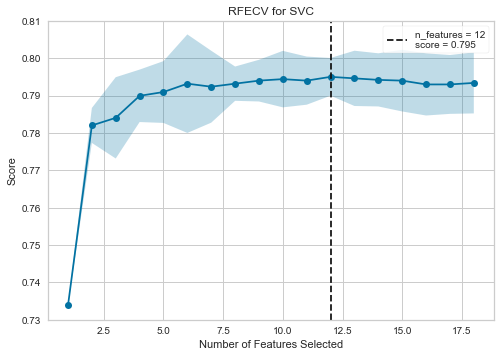

In [166]:
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1),cv=3)

visualizer.fit(X_train_std, y_train.values.ravel())        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

RFECV recommends having top 12 features to get the best score and remaining 6 weakest features can be eliminated.

# Model Analysis

We will make use of three different classifcation models to identify which model will make a best fit.

The models that will be used are

1) Logistic Regression

2) Random Forest 

3) Decision Tree


# Logistic Regression

In [167]:
# We will now select only top 12 features for the analysis
features_new = tel_churn.loc[:,['gender', 'Partner', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges']]

# target
targets = tel_churn[['Churn']]

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# split dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(features_new, targets, test_size=0.3, random_state=10)

#scaling the data
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

log_model = LogisticRegression(penalty='l1',random_state=0,C=1)

In [169]:
log_model.fit(X_train_std,y_train)
y_pred_log = log_model.predict(X_test_std)

acc_lg_train = log_model.score(X_train_std, y_train)
acc_lg_test = log_model.score(X_test_std, y_test)

print("Accuracy for the train dataset",'{:.1%}'.format(acc_lg_train))
print("Accuracy for the test dataset",'{:.1%}'.format(acc_lg_test))

Accuracy for the train dataset 79.5%
Accuracy for the test dataset 81.2%


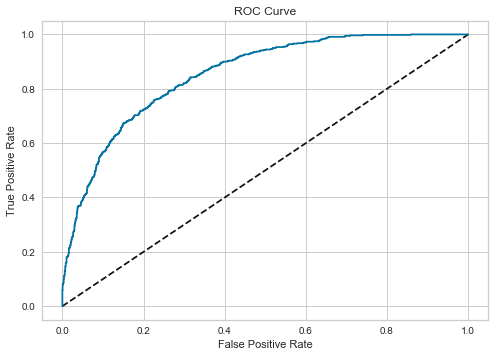

Area under the curve: 85.0%


In [170]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_model.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Area under the curve
auc_log = round(metrics.auc(fpr_lr,tpr_lr),2)
print("Area under the curve:",'{:.1%}'.format(auc_log))

In [176]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection


X_log_cv = features_new.values
y_log_cv = targets.values.flatten()

predicted_log_cv = model_selection.cross_val_predict(LogisticRegression(), X_log_cv, y_log_cv, cv=5)

log_cv_score = metrics.accuracy_score(y_log_cv, predicted_log_cv)

print("Accuracy of Logistic Regression after using Cross Validation is ",'{:.1%}'.format(log_cv_score))

Accuracy of Logistic Regression after using Cross Validation is  80.0%


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1551
           1       0.68      0.55      0.61       559

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression model')

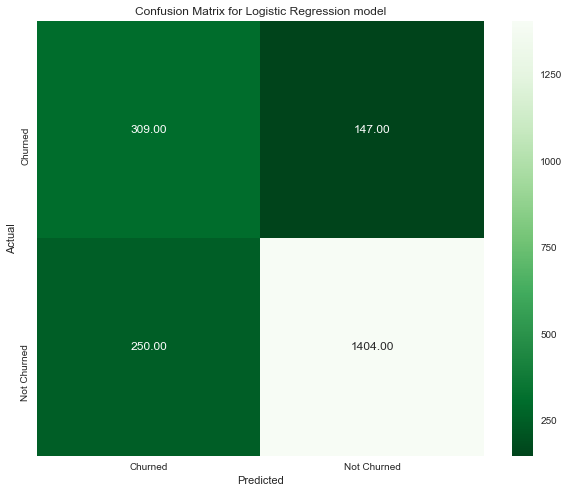

In [184]:
#Confusion Matrix for Logistic regression model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

log_cm = metrics.confusion_matrix(y_pred_log, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Churned", "Not Churned"] , yticklabels = ["Churned", "Not Churned"] ,cmap = plt.cm.Greens_r)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression model')

# Random Forest

In [188]:
rf_model = RandomForestClassifier(random_state=50,n_estimators=100)
rf_model.fit(X_train_std,y_train)
y_pred_rf = rf_model.predict(X_test_std)

acc_rf_train = rf_model.score(X_train_std, y_train)
acc_rf_test = rf_model.score(X_test_std, y_test)

print("Accuracy for the train dataset",'{:.1%}'.format(acc_rf_train))
print("Accuracy for the test dataset",'{:.1%}'.format(acc_rf_test))

Accuracy for the train dataset 99.7%
Accuracy for the test dataset 78.6%


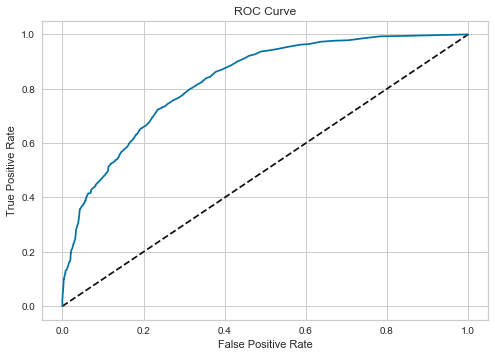

Area under the curve: 82.7%


In [191]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf_model.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Area under the curve
auc_rf = metrics.auc(fpr_rf,tpr_rf)
print("Area under the curve:",'{:.1%}'.format(auc_rf))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1551
           1       0.61      0.52      0.57       559

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5, 1.0, 'Confusion Matrix for random forest model')

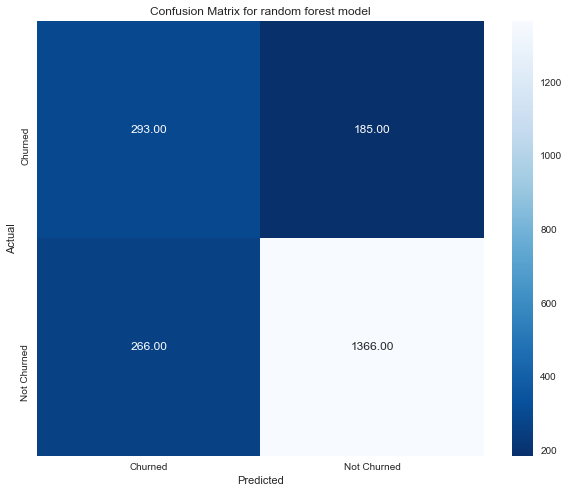

In [202]:
#Confusion Matrix for random forest model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

rf_cm = metrics.confusion_matrix(y_pred_rf, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(rf_cm, annot=True, fmt='.2f',xticklabels = ["Churned", "Not Churned"] , yticklabels = ["Churned", "Not Churned"] ,cmap = plt.cm.Blues_r)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for random forest model')

# Decision Tree

In [197]:
dt_model = tree.DecisionTreeClassifier(random_state=50,criterion='gini', splitter='best')
dt_model.fit(X_train_std,y_train)
y_pred_dt = rf_model.predict(X_test_std)

acc_dt_train = dt_model.score(X_train_std, y_train)
acc_dt_test = dt_model.score(X_test_std, y_test)

print("Accuracy for the train dataset",'{:.1%}'.format(acc_dt_train))
print("Accuracy for the test dataset",'{:.1%}'.format(acc_dt_test))

Accuracy for the train dataset 99.7%
Accuracy for the test dataset 71.9%


In [204]:
X_dt_cv = features_new.values
y_dt_cv = targets.values.flatten()

predicted_dt_cv = model_selection.cross_val_predict(tree.DecisionTreeClassifier(), X_dt_cv, y_dt_cv, cv=5)

dt_cv_score = metrics.accuracy_score(y_dt_cv, predicted_dt_cv)

print("Accuracy of decision tree after using Cross Validation is ",'{:.1%}'.format(dt_cv_score))

Accuracy of decision tree after using Cross Validation is  72.2%


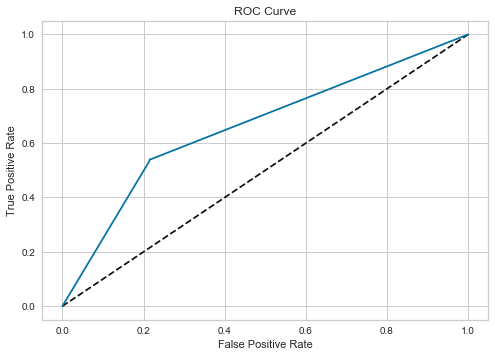

Area under the curve: 66.2%


In [198]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = dt_model.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Area under the curve
auc_dt = metrics.auc(fpr_dt,tpr_dt)
print("Area under the curve:",'{:.1%}'.format(auc_dt))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1551
           1       0.61      0.52      0.57       559

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5, 1.0, 'Confusion Matrix for decision tree model')

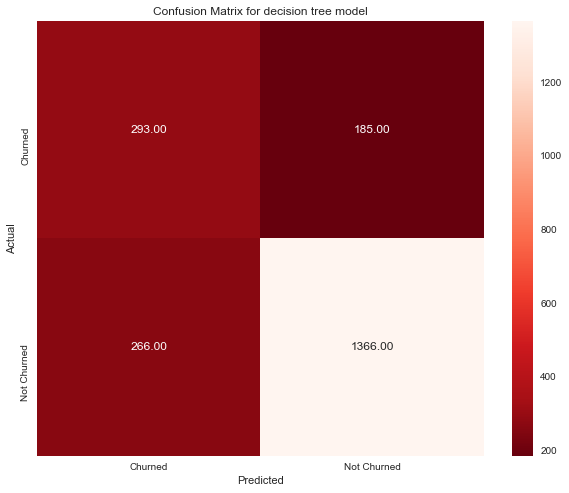

In [199]:
#Confusion Matrix for decision tree model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

dt_cm = metrics.confusion_matrix(y_pred_dt, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(dt_cm, annot=True, fmt='.2f',xticklabels = ["Churned", "Not Churned"] , yticklabels = ["Churned", "Not Churned"] ,cmap = plt.cm.Reds_r)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for decision tree model')

Out of three models that was used for the analysis, logistic regression model fared well when it comes to the prediction. The accuracy of the test data was around 81%. The ROC curve which was used to evalute the model had a score of 85% for the logistic regression model there by indicating that the model had a better probability of predicting the customer churn out of all the models.The average precision and recall score was the highest for logistic regression model which suggests the model was able to better predict the churned customer when the customer was indeed leaving the service. The 5-fold cross validation did confirm the effectiveness of the logistic regression model by calculating cv score 0f 80%.

# Model tuning of logistic regression model

In [207]:
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    features_new, targets, shuffle=True, test_size=0.2, random_state=50)

#scaling the data
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# fit Model
model=logisticRegression().fit(X_train_std, y_train.values.ravel())

print("R²: ", model.score(X_test_std, y_test))
predictions = model.predict(X_test_std)
mse = mean_squared_error(y_test.values.ravel(), predictions)
rmse = np.sqrt(mse)
print("rmse: ", rmse)

R²:  0.8130774697938877
rmse:  0.4323453830054304


The hyper-parameters should be tuned in such a way that the R² score is moving towards 1.

In [216]:
#Grid Search
from sklearn.model_selection import GridSearchCV

gb_grid_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gs = GridSearchCV(model, gb_grid_params, cv=5)

gs.fit(features_new, targets.values.ravel())
gs.cv_results_

{'mean_fit_time': array([0.01635556, 0.02214108, 0.02094378, 0.02094321, 0.02034478,
        0.02134199, 0.02034497]),
 'std_fit_time': array([0.0014926 , 0.00193407, 0.00154582, 0.00141054, 0.0010172 ,
        0.00101681, 0.00119682]),
 'mean_score_time': array([0.0011971 , 0.00099692, 0.0009975 , 0.00099773, 0.00079832,
        0.00099754, 0.00099788]),
 'std_score_time': array([3.98755084e-04, 1.91092157e-06, 9.34406182e-07, 1.78416128e-07,
        3.99160428e-04, 6.30675757e-04, 2.43140197e-07]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.80170576, 0.80881308, 0.80952381, 0.80810235, 0.80739161,
        0.80668088, 0.80668088]),
 'split1_test_score': array([0.7938877 , 0.79673063, 0.80099502, 0.8002

In [219]:
gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

The best C value was 1 which we had already used for the modelling. Hence, there was no changes required for the logistic model.

# Summary

1) It was clear from the analysis that the features such as tenure, monthly charges, contract, payment method, online security and tech support played a major role in deciding the customer churn.

2) Customers having a tenure of less than 10 months were more vulnerable to churn.

3) The Recursive Feature Elimination method helped us in eliminating six weakest features.

4) The logistic regression model was found to be the best classification model to predict the customer churn among Random forest and Decision tree models. However, the accuracy score was not the convincing one as it had only managed to score around 81%.

5) The tuning of hyper parameter was not successful as we focused on only one parameter. Tuning needs to be performed for other hyper parameters as well to check the capability of the algorithm.